**Packages and Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import joblib
from google.colab import files
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

**Exploratory Analysis**


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

Mounted at /content/drive


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df["RainTomorrow"].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877



**Data Preprocessing**


In [ ]:
# create a table with data missing
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


<Axes: >

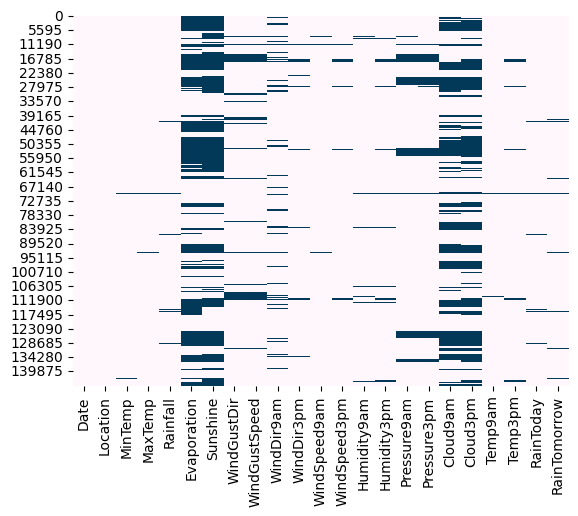

In [ ]:
# Missing Data Pattern in Training Data
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216


In [3]:
df = df.dropna(subset=['RainTomorrow'])

In [4]:
#categorical columns
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#converting RainToday and RainTomorrow in to numerical
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

<ipython-input-5-5ff7007ac4a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-5-5ff7007ac4a5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-5-5ff

In [6]:
# Impute categorical var with Mode
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [7]:
# Convert categorical features to continuous features with Label Encoding
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [8]:
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
MiceImputed = df.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

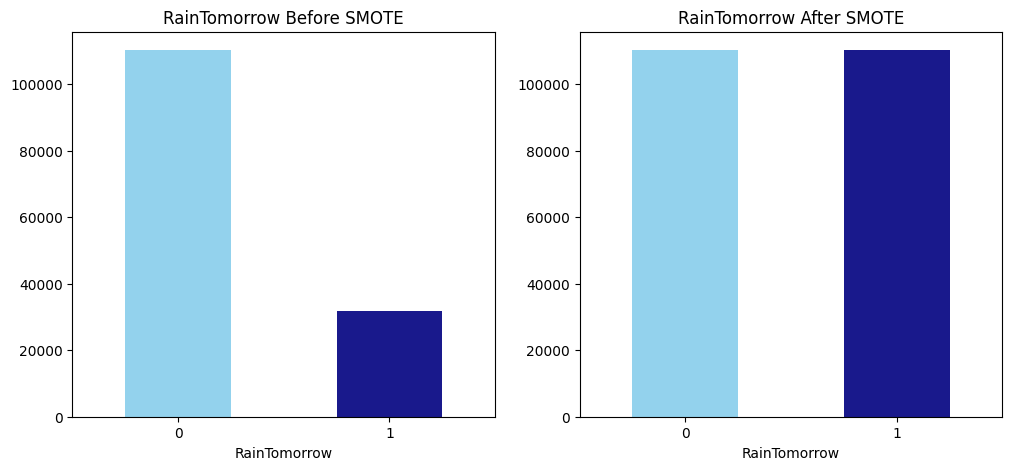

In [9]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Plot the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
MiceImputed['RainTomorrow'].value_counts().plot(kind='bar', ax=ax[0], color=['skyblue', 'navy'], alpha=0.9, rot=0)
ax[0].set_title('RainTomorrow Before SMOTE')

# After SMOTE
resampled_df['RainTomorrow'].value_counts().plot(kind='bar', ax=ax[1], color=['skyblue', 'navy'], alpha=0.9, rot=0)
ax[1].set_title('RainTomorrow After SMOTE')

plt.show()

In [ ]:
resampled_df.shape

(220632, 23)

In [ ]:
#range of values of features
def feature_range_by_class(df, target_column):

    class_ranges = {}
    for class_label in df[target_column].unique():
        class_data = df[df[target_column] == class_label]
        feature_ranges = class_data.describe().loc[['min', 'max']]
        class_ranges[class_label] = feature_ranges

    return class_ranges

# Calculate feature ranges for 'RainTomorrow' classes
feature_ranges = feature_range_by_class(resampled_df, 'RainTomorrow')


for class_label, ranges in feature_ranges.items():
    print(f"Feature Ranges for RainTomorrow = {class_label}:\n")
    print(ranges)
    print("\n")

Feature Ranges for RainTomorrow = 0:

       Date  Location    MinTemp  MaxTemp    Rainfall  Evaporation   Sunshine  \
min     4.0       0.0 -11.140543     -4.8   -4.328328    -4.958583  -1.036215   
max  3435.0      48.0  33.900000     48.1  240.000000   145.000000  20.148158   

     WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
min          0.0       6.000000         0.0  ...   -86.096950   -64.898518   
max         15.0     135.698165        15.0  ...   114.180508   100.000000   

     Pressure9am  Pressure3pm   Cloud9am   Cloud3pm  Temp9am  Temp3pm  \
min        982.9        983.2  -3.062417  -2.520959     -7.2     -5.4   
max       1041.0       1039.6  10.021152  10.318385     40.2     46.7   

     RainToday  RainTomorrow  
min  -0.315624           0.0  
max   1.000000           0.0  

[2 rows x 23 columns]


Feature Ranges for RainTomorrow = 1:

       Date  Location  MinTemp  MaxTemp    Rainfall  Evaporation   Sunshine  \
min     0.0       0.0     -7

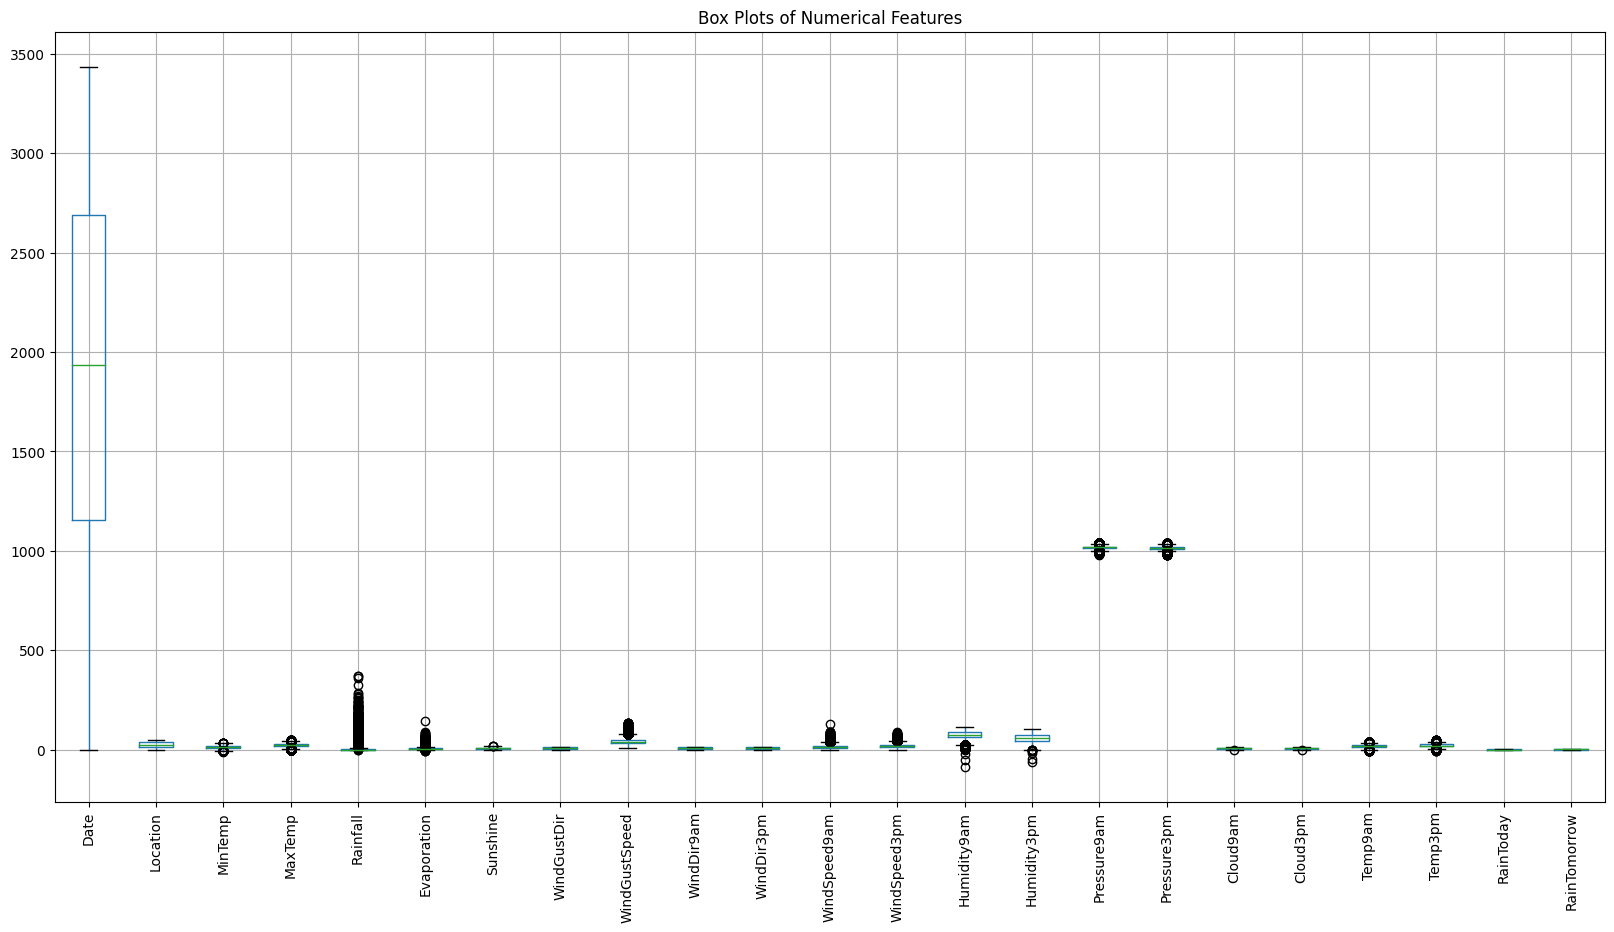

In [ ]:
plt.figure(figsize=(20, 10))
resampled_df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

<Axes: >

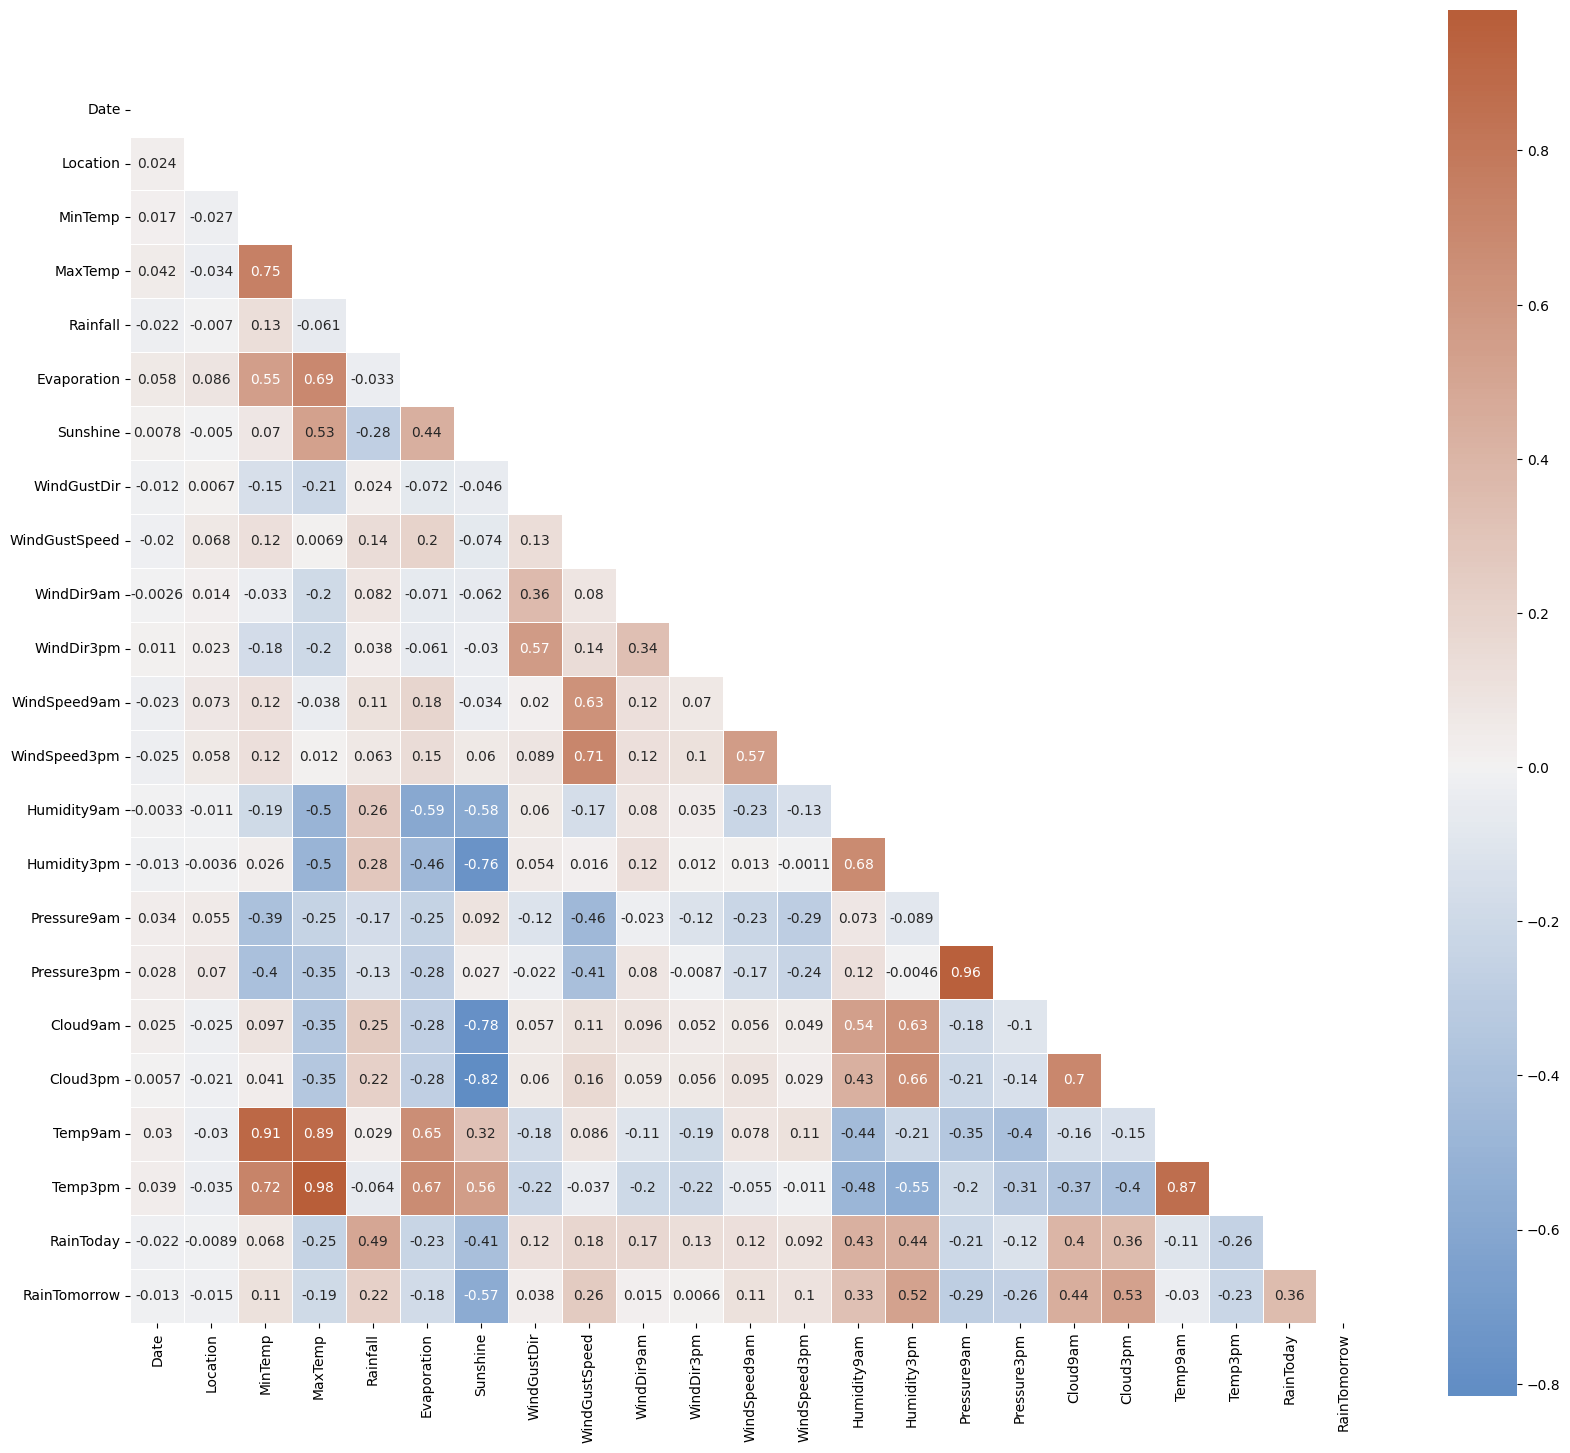

In [ ]:
# Correlation Heatmap
corr = resampled_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following feature pairs have a strong correlation with each other:
* MaxTemp and Temp3pm
* Pressure3pm and Pressure9am
* Temp9am and MinTemp
* Temp9am and MaxTemp
But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality


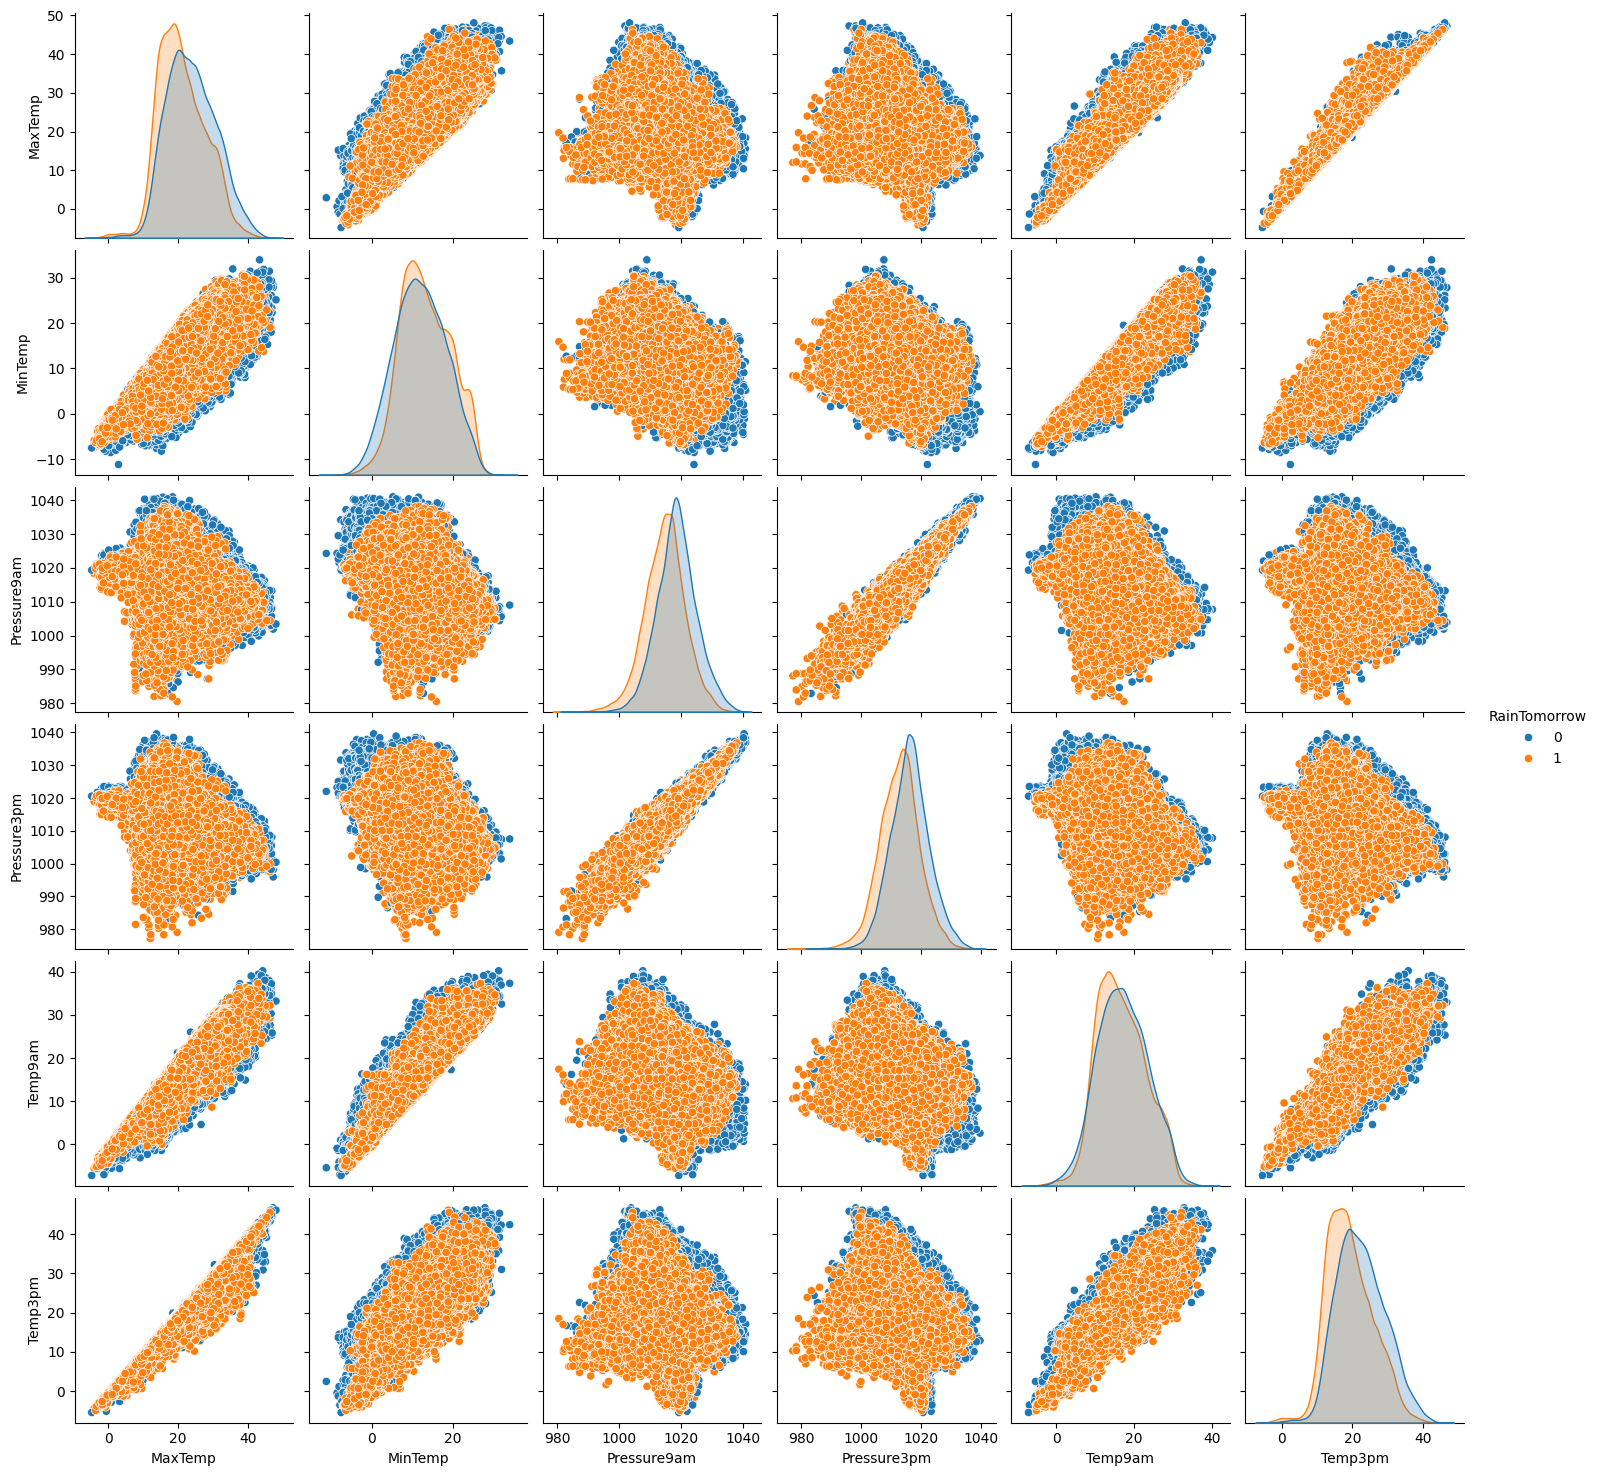

In [ ]:
sns.pairplot( data=resampled_df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am','Temp3pm' ), hue='RainTomorrow' )

In [10]:
X = resampled_df.drop('RainTomorrow', axis=1)
y = resampled_df['RainTomorrow']
# Select the 10 best features from the feature set (excluding 'RainTomorrow')
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names (without the target variable)
selected_columns = X.columns[selector.get_support()]  # Use X.columns here
print("Selected columns:", selected_columns)

# Create a new dataframe with the selected features
modified_data_selected = pd.DataFrame(X_selected, columns=selected_columns)

Selected columns: Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday'],
      dtype='object')


In [11]:
#Normalizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(modified_data_selected)
modified_data = pd.DataFrame(r_scaler.transform(modified_data_selected),
                             index=modified_data_selected.index,
                             columns=modified_data_selected.columns)
modified_data['RainTomorrow'] = y.values
modified_data.head()

,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,0.444772,0.292988,0.781301,0.510689,0.449587,0.4800,0.823164,0.516418,0.522073,0.218277,0
1,0.612625,0.292988,0.647020,0.528320,0.497521,0.4912,0.361180,0.346741,0.570058,0.218277,0
2,0.649792,0.308408,0.617180,0.557704,0.447934,0.5056,0.368601,0.307121,0.548944,0.218277,0
3,0.639943,0.138784,0.651993,0.475428,0.613223,0.5712,0.299536,0.295190,0.612284,0.218277,0
4,0.387569,0.269857,0.836008,0.575334,0.500826,0.4624,0.748754,0.714717,0.673704,0.218277,0


In [ ]:
# download the dataset without missing values
modified_data_selected['RainTomorrow'] = y.values
modified_data_selected.to_excel('modified_data_selected.xlsx', index=False)
from google.colab import files
files.download('modified_data_selected.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Split the  data into train and test sets
X_new = modified_data.drop(columns=['RainTomorrow'])
y_remaining =modified_data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_remaining, test_size=0.2, random_state=42)

In [ ]:
# 1. Artificial Neural Network (ANN)
ann_model = MLPClassifier(random_state=42, verbose=1, hidden_layer_sizes=(100, 50), activation='relu',
                          solver='adam')
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print("ANN Accuracy:", ann_accuracy)

Iteration 1, loss = 0.43625594
Iteration 2, loss = 0.39106668
Iteration 3, loss = 0.37802078
Iteration 4, loss = 0.37273295
Iteration 5, loss = 0.36847754
Iteration 6, loss = 0.36694064
Iteration 7, loss = 0.36562620
Iteration 8, loss = 0.36338205
Iteration 9, loss = 0.36237041
Iteration 10, loss = 0.36099205
Iteration 11, loss = 0.35881008
Iteration 12, loss = 0.35813066
Iteration 13, loss = 0.35462033
Iteration 14, loss = 0.35447567
Iteration 15, loss = 0.35186488
Iteration 16, loss = 0.35040258
Iteration 17, loss = 0.34834977
Iteration 18, loss = 0.34622845
Iteration 19, loss = 0.34580393
Iteration 20, loss = 0.34240301
Iteration 21, loss = 0.34190567
Iteration 22, loss = 0.34122081
Iteration 23, loss = 0.33895859
Iteration 24, loss = 0.33788428
Iteration 25, loss = 0.33638035
Iteration 26, loss = 0.33450602
Iteration 27, loss = 0.33391514
Iteration 28, loss = 0.33153694
Iteration 29, loss = 0.33131616
Iteration 30, loss = 0.33088002
Iteration 31, loss = 0.32782000
Iteration 32, los

In [ ]:
#ANN model training accuracy
ann_training=ann_model.score(X_train,y_train)
ann_precision = precision_score(y_test, ann_predictions)
ann_recall = recall_score(y_test, ann_predictions)
ann_f1 = f1_score(y_test, ann_predictions)

print("ANN training accuracy:", ann_training)
print("ANN Precision:", ann_precision)
print("ANN Recall:", ann_recall)
print("ANN F1 Score:", ann_f1)

ANN training accuracy: 0.8800770516415966
ANN Precision: 0.8595718971172104
ANN Recall: 0.8999231916143315
ANN F1 Score: 0.879284847147114


In [ ]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(random_state=42, C=1, kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.807714097944569


In [ ]:
#SVM model training accuracy
svm_training=svm_model.score(X_train,y_train)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("SVM training accuracy:",svm_training)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

SVM training accuracy: 0.8116653919152432
SVM Precision: 0.8074981975486661
SVM Recall: 0.8096507477522252
SVM F1 Score: 0.8085730400451213


In [13]:
# 3. Random Forest
params_rf = {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100,
             'random_state': 12345}
model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9013302513200535


In [ ]:
#RF model training accuracy
rf_training=model_rf.score(X_train,y_train)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest training accuracy:",rf_training)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest training accuracy: 0.9782385768108552
Random Forest Precision: 0.9019306415879188
Random Forest Recall: 0.9012786337143631
Random Forest F1 Score: 0.9016045197740113


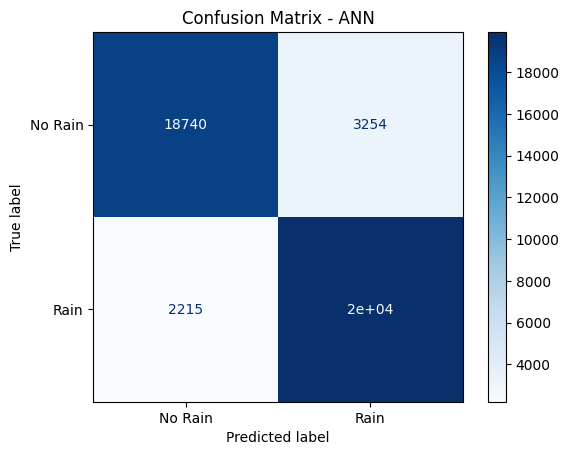

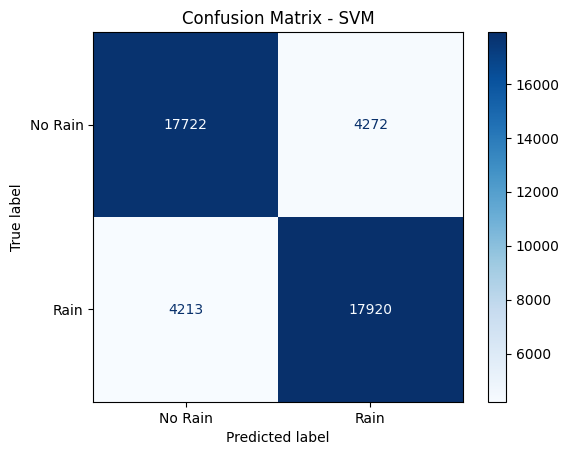

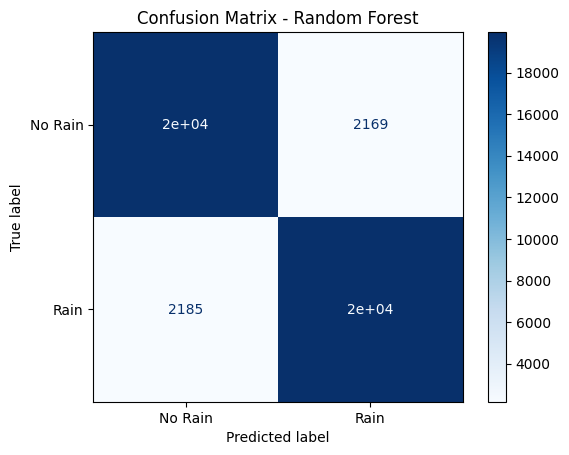

In [ ]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot for ANN
plot_confusion_matrix('ANN', y_test, ann_predictions)

# Plot for SVM
plot_confusion_matrix('SVM', y_test, svm_predictions)

# Plot for Random Forest
plot_confusion_matrix('Random Forest', y_test, rf_predictions)

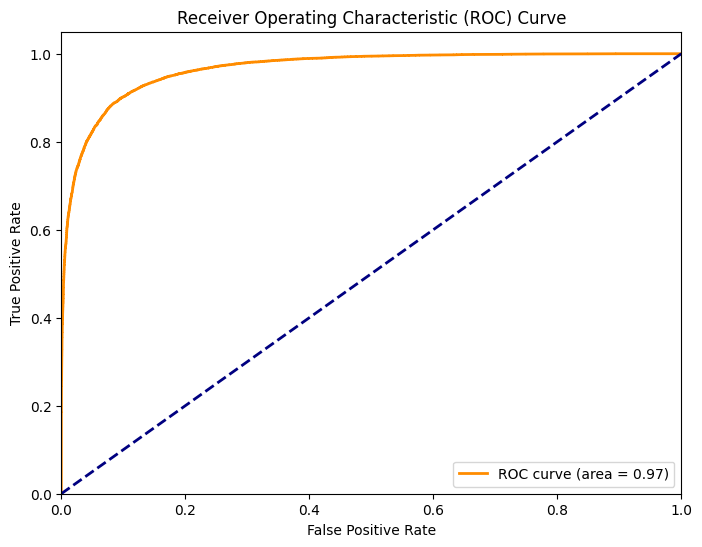

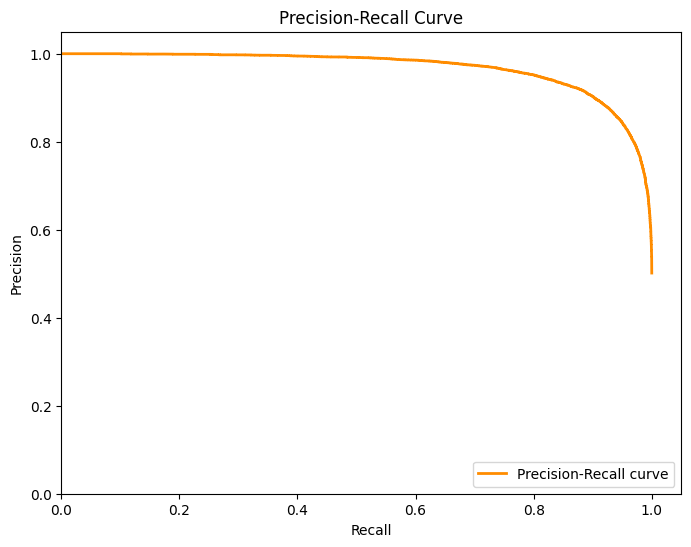

In [14]:
# Get predicted probabilities
rf_probs = model_rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# user input
selected_columns = ['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday'5]
input_data = []
for feature in selected_columns:
    value = float(input(f"Enter value for {feature}: "))
    input_data.append(value)

input_df = pd.DataFrame([input_data], columns=selected_columns)

normalized_input = r_scaler.transform(input_df)

prediction = model_rf.predict(normalized_input)[0]

if prediction == 0:
    print("Prediction: No rain tomorrow")
else:
    print("Prediction: Rain tomorrow")

Enter value for Sunshine: 4.30
Enter value for WindGustSpeed: 20
Enter value for Humidity9am: 99
Enter value for Humidity3pm: 58
Enter value for Pressure9am: 1021
Enter value for Pressure3pm: 1019.3
Enter value for Cloud9am: 8
Enter value for Cloud3pm: 5.8
Enter value for Temp3pm: 15.6
Enter value for RainToday: 0
Prediction: No rain tomorrow


In [ ]:
#download the model
joblib.dump(model_rf, 'model.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#download scalar
joblib.dump(r_scaler, 'minmax_scaler.pkl')
files.download('minmax_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>